In [21]:
import pandas as pd

movies = pd.read_csv("../data/movies_trmean.csv")

# Print the first 5 rows
print(movies.head())

# Print the summary statistics for all columns
print(movies.describe(include="all"))

                              movie  production_budget  domestic_gross  \
0                     Evan Almighty        175000000.0     100289690.0   
1                        Waterworld        175000000.0      88246220.0   
2  King Arthur: Legend of the Sword        175000000.0      39175066.0   
3                          47 Ronin        175000000.0      38362475.0   
4    Jurassic World: Fallen Kingdom        170000000.0     416769345.0   

   worldwide_gross mpaa_rating      genre  
0     1.741313e+08          PG     Comedy  
1     2.642462e+08       PG-13     Action  
2     1.399507e+08       PG-13  Adventure  
3     1.517168e+08       PG-13     Action  
4     1.304866e+09       PG-13     Action  
                 movie  production_budget  domestic_gross  worldwide_gross  \
count             3401       3.401000e+03    3.401000e+03     3.401000e+03   
unique            3400                NaN             NaN              NaN   
top     Tau ming chong                NaN             NaN

## Central Tendency for Quantitative Data

For quantitative variables, we often want to describe the central tendency, or the "typical" value of a variable. For example, what is the typical cost of rent in New York City?

There are several common measures of central tendency:

- **Mean**: The average value of the variable, calculated as the sum of all values divided by the number of values.
- **Median**: The middle value of the variable when sorted.
- **Mode**: The most frequent value of the variable.
- **Trimmed mean**: The mean excluding x percent of the lowest and highest data points.


In [22]:
import pandas as pd
from scipy.stats import trim_mean

movies = pd.read_csv("../data/movies_trmean.csv")

# Save the mean to mean_budget
mean_budget = movies.production_budget.mean()
print(mean_budget)

# Save the median to med_budget
med_budget = movies.production_budget.median()
print(med_budget)

# Save the mode to mode_budget
mode_budget = movies.production_budget.mode()
print(mode_budget)

# Save the trimmed mean to trmean_budget
trmean_budget = trim_mean(movies.production_budget, proportiontocut=0.2)
print(trmean_budget)

33284743.23640106
20000000.0
0    20000000.0
Name: production_budget, dtype: float64
23949546.79078883


## Spread for Quantitative Data

The spread of a quantitative variable describes the amount of variability. This is important because it provides context for measures of central tendency. For example, if there is a lot of variability in New York City rent prices, we can be less certain that the mean or median price is representative of what the typical rent is.

There are several common measures of spread:

- **Range**: The difference between the maximum and minimum values of a variable.
- **Interquartile range (IQR)**: The difference between the 75th and 25th percentile values.
- **Variance**: The average of the squared distance from each data point to the mean.
- **Standard deviation (SD)**: The square root of the variance.
- **Mean absolute deviation (MAD)**: The mean absolute value of the distance between each data point and the mean.


In [23]:
import pandas as pd
from scipy.stats import iqr

movies = pd.read_csv("../data/movies_trmean.csv")

# Save the range to range_budget
range_budget = movies.production_budget.max() - movies.production_budget.min()
print(range_budget)

# Save the interquartile range to iqr_budget
iqr_budget = iqr(movies.production_budget)
print(iqr_budget)

# Save the variance to var_budget
var_budget = movies.production_budget.var()
print(var_budget)

# Save the standard deviation to std_budget
std_budget = movies.production_budget.std()
print(std_budget)

# Save the mean absolute deviation to mad_budget
mad_budget = abs(movies.production_budget - movies.production_budget.mean()).mean()
print(mad_budget)

174750000.0
36000000.0
1217478921139147.8
34892390.5907742
26090426.818845242


## Visualizing Quantitative Variables

While summary statistics are certainly helpful for exploring and quantifying a feature, we might find it hard to wrap our minds around a bunch of numbers. This is why data visualization is such a powerful element of EDA.

For quantitative variables, boxplots and histograms are two common visualizations. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (e.g., skew or multimodality).

Python's seaborn library, built on top of matplotlib, offers the `boxplot()` and `histplot()` functions to easily plot data from a pandas DataFrame:


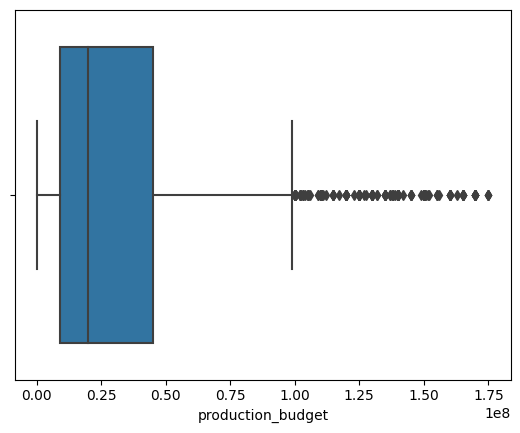

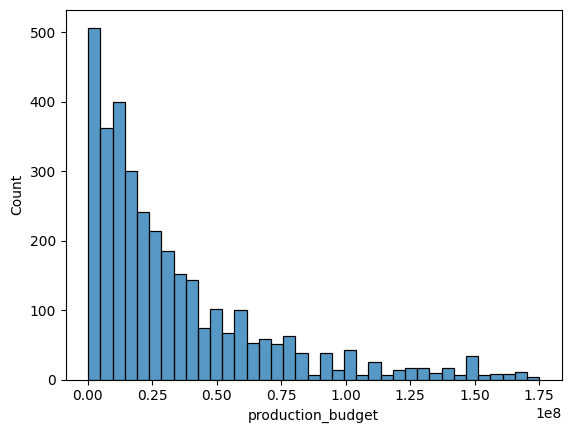

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv("../data/movies_trmean.csv")

# Create a boxplot for movie budget
sns.boxplot(x="production_budget", data=movies)
plt.show()
plt.close()

# Create a histogram for movie budget
sns.histplot(x="production_budget", data=movies)
plt.show()
plt.close()

## Value Counts for Categorical Data

When it comes to categorical variables, the measures of central tendency and spread that worked for describing numeric variables, like mean and standard deviation, generally becomes unsuitable when we're dealing with discrete values. Unlike numbers, categorical values are not continuous and oftentimes do not have an intrinsic ordering.

Instead, a good way to summarize categorical variables is to generate a frequency table containing the count of each distinct value. For example, we may be interested to know how many of the New York City rental listings are from each borough. Related, we can also find which borough has the most listings.

The pandas library offers the `.value_counts()` method for generating the counts of all values in a DataFrame column:

```python
# Counts of rental listings in each borough
df.borough.value_counts()
```

Output:

```bash
Manhattan    3539
Brooklyn     1013
Queens        448
```

By default, it returns the results sorted in descending order by count, where the top element is the mode, or the most frequently appearing value. In this case, the mode is Manhattan with 3,539 rental listings.


In [25]:
import pandas as pd

movies = pd.read_csv("../data/movies_trmean.csv")

# Save the counts to genre_counts
genre_counts = movies.genre.value_counts()
print(genre_counts)

genre
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: count, dtype: int64


## Value Proportions for Categorical Data

A counts table is one approach for exploring categorical variables, but sometimes it is useful to also look at the proportion of values in each category. For example, knowing that there are 3,539 rental listings in Manhattan is hard to interpret without any context about the counts in the other categories. On the other hand, knowing that Manhattan listings make up 71% of all New York City listings tells us a lot more about the relative frequency of this category.

We can calculate the proportion for each category by dividing its count by the total number of values for that variable:

```python
# Proportions of rental listings in each borough
rentals.borough.value_counts() / len(rentals.borough)
```

Output:

```bash
Manhattan    0.7078
Brooklyn     0.2026
Queens       0.0896
```

Alternatively, we could also obtain the proportions by specifying `normalize=True` to the `.value_counts()` method:

```python
df.borough.value_counts(normalize=True)
```


In [26]:
genre_props = movies.genre.value_counts(normalize=True)
print(genre_props)


genre
Drama        0.363423
Comedy       0.239047
Action       0.168480
Adventure    0.141429
Horror       0.087621
Name: proportion, dtype: float64


Visualizing Categorical Variables
For categorical variables, bar charts and pie charts are common options for visualizing the count (or proportion) of values in each category. They can also convey the relative frequencies of each category.

Python’s seaborn library offers several functions that can create bar charts. The simplest for plotting the counts is countplot():

# Bar chart for borough
sns.countplot(x='borough', data=rentals)
plt.show()
plt.close()
Bar chart of borough

There are currently no functions in the seaborn library for creating a pie chart, but the pandas library provides a convenient wrapper function around matplotlib‘s pie() function that can generate a pie chart from any column in a DataFrame:

# Pie chart for borough
rentals.borough.value_counts().plot.pie()
plt.show()
plt.close()
Pie chart of borough

In general, many data analysts avoid pie charts because people are better at visually comparing areas of rectangles than wedges of a pie. For a variable with a small number of categories (i.e., fewer than three), a pie chart is a reasonable choice; however, for more complex data, a bar chart is usually preferable.

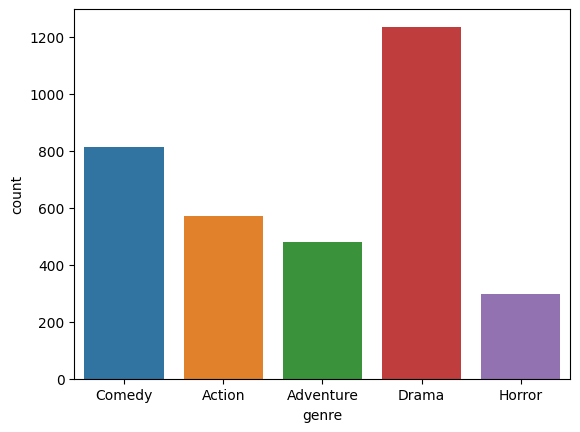

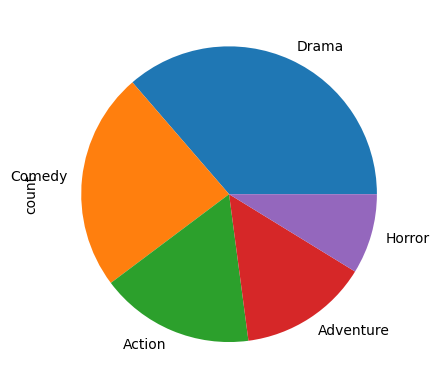

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

movies = pd.read_csv("../data/movies_trmean.csv")

# Create a bar chart for movie genre 
sns.countplot(x='genre', data=movies)
plt.show()
plt.close()

# Create a pie chart for movie genre
movies.genre.value_counts().plot.pie()
plt.show()
plt.close()

## Review

In this lesson, you’ve learned about the common ways to summarize and visualize quantitative and categorical variables for the purpose of EDA.

We can use .describe(include='all') to quickly display common summary statistics for all columns in a pandas DataFrame.
For quantitative variables, measures of central tendency (e.g., mean, median, mode) and spread (e.g., range, variance, standard deviation) are good ways to summarize the data. Boxplots and histograms are often used for visualization.
For categorical variables, the relative frequencies of each category can be summarized using a table of counts or proportions. Bar charts and pie charts are often used for visualization.
Being able to use the appropriate metrics and visuals to explore the variables in your dataset can help you to draw insights from your data and prepare for more rigorous analysis and modeling down the road.